In [233]:
import numpy as np
import math
import matplotlib.pyplot as plt
import speclite
import pandas as pd
from astropy import units as u
from astropy import constants as const
from astropy.analytic_functions import blackbody_lambda, blackbody_nu
from scipy import integrate
from numpy import array
%matplotlib inline

"""
Define constants, which are used in necessary formulas such as
Planck constant h, speed of light in vacuum c, Boltzmann constant k.
(later I figured out, that they all defined in Scipy library at scipy.constants,
so they could be just imported straight from there)
"""

h = 6.6260695e-34
c = 3e8
k = 1.380648e-23

Let's come up with solution by two defferent ways: without using of Astropy and with it.

In [194]:
"""
function describing Planck`s Law
takes two arguments: wl - given wavelength in nm, temp - given temperature in K
returns intensity at given wavelength and temperature
"""

def Planck(wl, temp):
    a = 2.0 * h * np.pi* c**2 / (wl**5)
    b = h*c/(wl* k * temp)
    intensity = a * (1 / (np.exp(b) - 1.0))
    return intensity

"""
function describing observed flux value of star 
takes four arguments: wl - given wavelength in nm, temp - given temperature in K, R - the radius of star in m, 
                      r - distance from earth in m
returns flux value of star with radius R on distance r from Earth
"""
def flux(wl, temp, R, r):
    return Planck(wl, temp) * (R / r)**2
#TODO parameters without big e-9.

In order to gain data to plot, let's generate range of intensities:

In [464]:
#values starting from 1 nanometer to 4 micrometer with 1 nm step
#range of wavelenghts for different bands
with np.errstate(all='ignore'):
    WaveLengths = np.arange(1e-9, 4e-6, 1e-9)  
    Temperatures = np.arange(3000., 8000., 1000.)
    Intensities = [Planck(WaveLengths, i) for i in Temperatures]
    

Let`s also generate dataframe of wavelenghts and filter responses from http://spiff.rit.edu/classes/phys440/lectures/filters/filters.html using Pandas

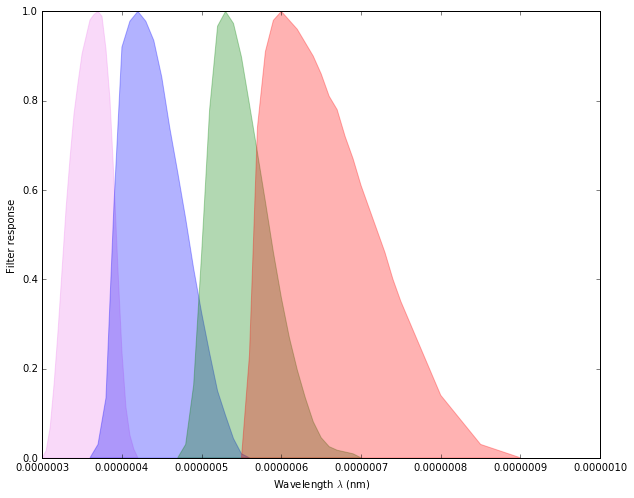

In [468]:
U_band = pd.read_csv('u_pass.csv', sep="	", names=["WaveL", "Transmission"])
B_band = pd.read_csv('b_pass.csv', sep="	", names=["WaveL", "Transmission"])
V_band = pd.read_csv('v_pass.csv', sep="	", names=["WaveL", "Transmission"])
R_band = pd.read_csv('r_pass.csv', sep="	", names=["WaveL", "Transmission"])

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Wavelength $\lambda$ (nm)')
ax.set_ylabel('Filter response')
plt.fill([i*1e-10 for i in U_band["WaveL"].tolist()], U_band["Transmission"].tolist(), color='violet', alpha=0.3)
plt.fill([i*1e-10 for i in B_band["WaveL"].tolist()], B_band["Transmission"].tolist(), color='blue', alpha=0.3)
plt.fill([i*1e-10 for i in V_band["WaveL"].tolist()], V_band["Transmission"].tolist(), color='green', alpha=0.3)
plt.fill([i*1e-10 for i in R_band["WaveL"].tolist()], R_band["Transmission"].tolist(), color='red', alpha=0.3)

Let`s calculate separete intensities for different magnitudes

(Actually, I was struggling with plot, which illustrates "filter" section of applet from project description.)

In [463]:
U_wl = [i for i in U_band["WaveL"].tolist()]
inten_for_U = [Planck(j, 8000.) *float(U_band["Transmission"].tolist()[i]) for i,j in enumerate(U_wl)]

B_wl = [i for i in B_band["WaveL"].tolist()]
inten_for_B = [Planck(j, 3000.) *float(B_band["Transmission"].tolist()[i]) for i,j in enumerate(B_wl)]

V_wl = [i for i in V_band["WaveL"].tolist()]
inten_for_V = [Planck(j, 3000.) *float(V_band["Transmission"].tolist()[i]) for i,j in enumerate(V_wl)]

R_wl = [i for i in R_band["WaveL"].tolist()]
inten_for_R = [Planck(j, 3000.) *float(R_band["Transmission"].tolist()[i]) for i,j in enumerate(R_wl)]

Plot of flux vs. wavelength for a black body of a given temperature

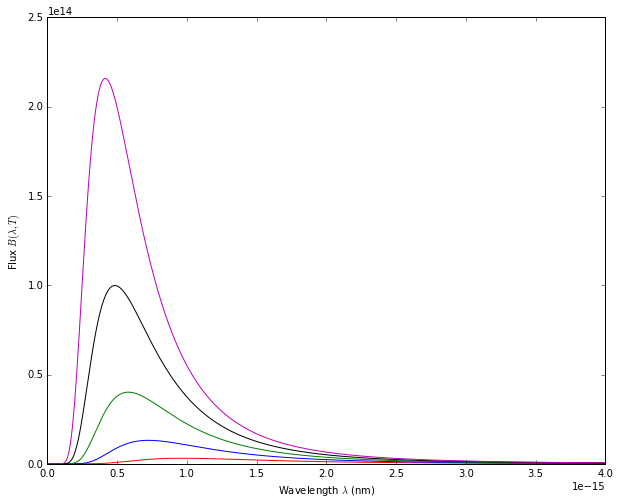

In [452]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Wavelength $\lambda$ (nm)')
ax.set_ylabel('Flux $B(\lambda, T)$')
for i, colour in enumerate(['r', 'b', 'g', 'k', 'm']):
    plt.plot(WaveLengths*1e-9, Intensities[i], color=colour)

Our reference object is Vega. (actually, its' magnitude equals to 0.03, but we consider it as 0.00)
Considering U, V, B, R - Ultraviolet, Visible, Blue, Red respectively, radius R of star equals to Solar radius and distance from Earth is 10 parsecs(in meters).
Calculation of "average" magnitudes

In [198]:
with np.errstate(all='ignore'):
    """
    m_u = -2.5 * math.log10(integrate.quad(flux, 100e-9, 400e-9, flux_args)[0] / ( 0.163))
    m_v = -2.5 * math.log10(integrate.quad(flux, 400e-9, 700e-9, flux_args)[0] / (3.63e-3))
    m_b = -2.5 * math.log10(integrate.quad(flux, 435e-9, 500e-9, flux_args)[0] / (0.139))
    m_r = -2.5 * math.log10(integrate.quad(flux, 620e-9, 760e-9, flux_args)[0] / 4.5999e-3)
    """
    m_u = -2.5 * math.log10(flux(350e-9, 3000., 6.957e8, 3.086e17) / 3.98e-2)
    m_v = -2.5 * math.log10(flux(551e-9, 3000., 6.957e8, 3.086e17) / 3.63e-2)
    m_b = -2.5 * math.log10(flux(445e-9, 3000., 6.957e8, 3.086e17) / 6.95e-2)
    m_r = -2.5 * math.log10(flux(658e-9, 3000., 6.957e8, 3.086e17) / 2.25e-2)

In [199]:
print("FILTERS\nUltraviolet:", round(m_u, 3), "\nVisible:", round(m_v, 3),
      "\nBlue:", round(m_b, 3) , "\nRed:", round(m_r, 3))


FILTERS
Ultraviolet: 12.489 
Visible: 9.421 
Blue: 11.22 
Red: 8.327


There is a function in AstroPy blackbody_lambda doing the same. It takes wavelength in angstroms(1 A = 10 nm).

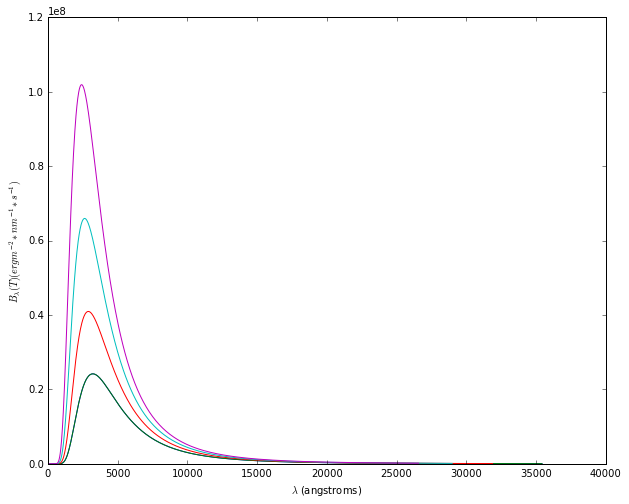

In [200]:
temperature = 9000 * u.K
waveset = np.logspace(0, np.log10(11 * (const.b_wien / temperature).to(u.AA).value), num=1000) * u.AA
with np.errstate(all='ignore'):
    flux = blackbody_lambda(waveset, temperature)

fig, ax = plt.subplots(figsize=(10, 8))

ax.get_yaxis().get_major_formatter().set_powerlimits((0, 1))
ax.set_xlabel('$\lambda$ (angstroms)')
ax.set_ylabel('$B_{\lambda}(T) (erg m^{−2}*nm^{−1}*s^{−1}) $')
for i, colour in enumerate(['r', 'b', 'g', 'k', 'm']):
    ax.plot(waveset.value, flux.value)
    temperature = (i*1000+9000) * u.K
    waveset = np.logspace(0, np.log10(11 * (const.b_wien / temperature).to(u.AA).value), num=1000) * u.AA
    with np.errstate(all='ignore'): flux = blackbody_lambda(waveset, temperature)
        

For magnitudes there is a speclite module in Astropy, which is responsible for functions concerning response filter according to Johnson-Cousins UBVRI system

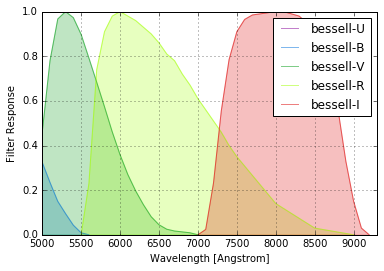

In [461]:
bessell = speclite.filters.load_filters('bessell-*')
speclite.filters.plot_filters(bessell, wavelength_limits=(5000, 9300))